In [303]:
# импортируем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [304]:
# установим размер и стиль Seaborn для последующих графиков
sns.set(rc = {'figure.figsize' : (8, 5)})

In [305]:
df_share = pd.read_excel('Polystar vs Torus_CDR Kirov Cells v1.xlsx')[['t.bad_subs_share', 'p.bad_subs_share']]
df_share


,t.bad_subs_share,p.bad_subs_share
0,0.072261,0.035129
1,0.182186,0.050584
2,0.076531,0.049865
3,0.000000,0.020642
4,0.099404,0.065543
...,...,...
4928,0.002188,0.006287
4929,0.111244,0.023539
4930,0.000000,0.000000
4931,0.101504,0.007447


In [306]:
df = pd.read_excel('Polystar vs Torus_CDR Kirov Cells v1.xlsx')[['p.bad_subs_share', 't.cnt_subs','t.bad_subs',	't.good_subs',	't.bad_subs_share',	'tt.total_calls',	'tt.bad_calls',	'tt.good_calls']]
df

,p.bad_subs_share,t.cnt_subs,t.bad_subs,t.good_subs,t.bad_subs_share,tt.total_calls,tt.bad_calls,tt.good_calls
0,0.035129,429,31,398,0.072261,3235,59,3176
1,0.050584,494,90,404,0.182186,3992,207,3785
2,0.049865,588,45,543,0.076531,4493,76,4417
3,0.020642,791,0,791,0.000000,4475,0,4475
4,0.065543,503,50,453,0.099404,4883,80,4803
...,...,...,...,...,...,...,...,...
4928,0.006287,7312,16,7296,0.002188,25881,22,25859
4929,0.023539,836,93,743,0.111244,2476,127,2349
4930,0.000000,100,0,100,0.000000,210,0,210
4931,0.007447,798,81,717,0.101504,3500,118,3382


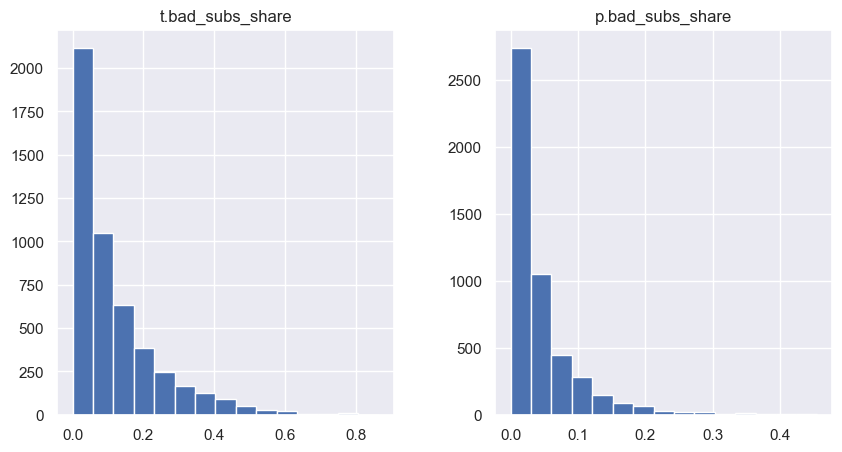

In [307]:
# посмотрим на данные с помощью гистограммы
df_share.hist(bins = 15, figsize = (10, 5));

In [308]:
df_share.describe()

,t.bad_subs_share,p.bad_subs_share
count,4933.000000,4933.000000
mean,0.115236,0.045107
std,0.127458,0.054614
min,0.000000,0.000000
25%,0.022403,0.011601
50%,0.073593,0.025806
75%,0.161123,0.056034
max,0.865487,0.454545


In [309]:
df.isnull().sum()

p.bad_subs_share    0
t.cnt_subs          0
t.bad_subs          0
t.good_subs         0
t.bad_subs_share    0
tt.total_calls      0
tt.bad_calls        0
tt.good_calls       0
dtype: int64

In [310]:
df.dropna(inplace=True)

In [ ]:
df.corr()

[Text(0.5, 1.0, 'Выбросы')]

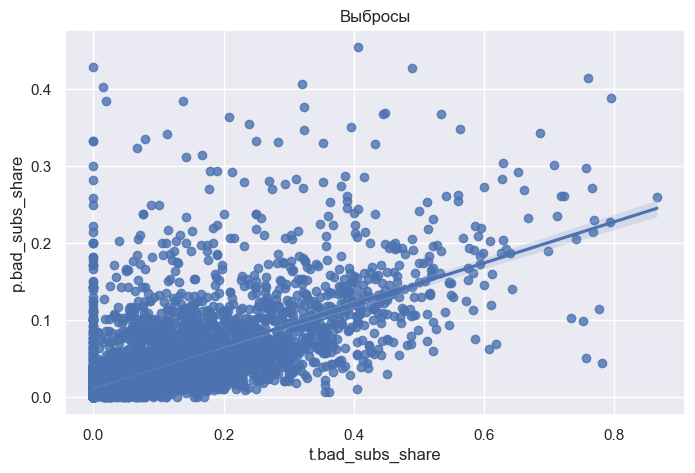

In [312]:

sns.regplot(data = df_share, x = 't.bad_subs_share', y = 'p.bad_subs_share').set(title = 'Выбросы')

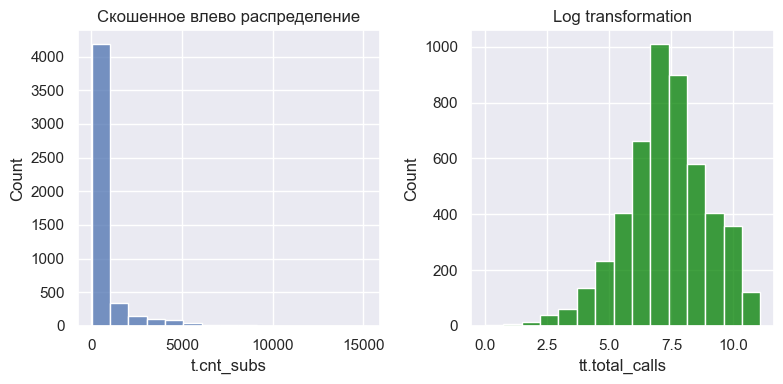

In [313]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8,4))
 
sns.histplot(x = df['t.cnt_subs'], bins = 15, ax = ax[0])
ax[0].set_title('Скошенное влево распределение')
 
sns.histplot(x = np.log(df['tt.total_calls'],),
             bins = 15, color = 'green',
            ax = ax[1])
ax[1].set_title('Log transformation')
 
plt.tight_layout()
plt.show() 

In [314]:
#y=np.log(df_share['p.bad_subs_share'])
#x=np.log(df_share['t.bad_subs_share'])


In [315]:
y = df['p.bad_subs_share']
X = df[['t.cnt_subs',	't.bad_subs', 't.bad_subs_share',		'tt.bad_calls']] #'t.good_subs',	't.bad_subs','tt.total_calls', ,	'tt.good_calls''tt.total_calls',

In [316]:
from sklearn.model_selection import train_test_split
# разобьем данные на обучающую и тестовую выборку
# размер тестовой выборки составит 30%
# также зададим точку отсчета для воспроизводимости
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

In [317]:
# из набора линейных моделей библиотеки sklearn импортируем линейную регрессию
from sklearn.linear_model import LinearRegression
 # создадим объект этого класса и запишем в переменную model
model = LinearRegression()
 # обучим нашу модель
model.fit(X_train, y_train)

LinearRegression()

In [318]:
# на основе нескольких независимых переменных (Х) предскажем цену на жилье (y)
y_pred = model.predict(X_test)
 
# выведем первые пять значений с помощью диапазона индексов
print(y_pred[:5])

[0.02808897 0.0287538  0.14619252 0.05423055 0.04646216]


In [319]:
# импортируем модуль метрик
from sklearn import metrics
 
# выведем корень среднеквадратической ошибки
# сравним тестовые и прогнозные значения цен на жилье
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error (RMSE): 0.04135658875572834


In [320]:
print('R2:', np.round(metrics.r2_score(y_test, y_pred), 2))

R2: 0.48


In [321]:
# выведем наклон и сдвиг с помощью атрибутов coef_ и intercept_ соответственно
print(model.coef_, model.intercept_)

[-2.19188227e-06 -2.83822883e-04  3.19043038e-01  2.70603275e-05] 0.01948897561474669


In [322]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 


#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,1.236641,t.cnt_subs
1,7.999830,t.bad_subs
2,2.494436,t.bad_subs_share
3,6.441859,tt.bad_calls


In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson


#fit multiple linear regression model
model = ols('df["p.bad_subs_share"] ~ df["t.cnt_subs"] + df["t.bad_subs_share"] + df["tt.total_calls"] + df["tt.bad_calls"]', data=df). fit ()

#view model summary
print(model.summary())


#perform Durbin-Watson test
durbin_watson(model.resid)